In [1]:
#augument the zip-code nyc geojson data
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import json
import pandas as pd
import numpy as np

In [2]:
# Print current working directory
print(f"Current directory: {os.getcwd()}")

# Change to parent directory
os.chdir('..')

Current directory: /Users/apple/Documents/GitHub/data_science_project/notebooks


In [3]:
demo_df=pd.read_csv('clean_data/clean_demographics_data.csv')
demo_df.head()

,zip_code,total_population,male_population,female_population,age_under_18,age_18_to_44,age_45_plus,race_white,race_native_american,race_asian
0,6390,53.0,37.0,16.0,8.0,24.0,21.0,31.0,0.0,0.0
1,10001,29079.0,14069.0,15010.0,4010.6,15181.4,6331.0,15893.0,32.0,5228.0
2,10002,75517.0,38110.0,37407.0,10757.2,28954.8,18537.0,23597.0,262.0,27700.0
3,10003,53825.0,26407.0,27418.0,9148.8,27316.2,9077.0,36193.0,68.0,9639.0
4,10004,3875.0,2118.0,1757.0,793.8,2117.2,787.0,2460.0,0.0,923.0


In [4]:
len(demo_df)

1824

In [5]:
edu_df=pd.read_csv('clean_data/clean_education_data.csv')
edu_df.head()

,zip_code,pop_25_over,pct_bachelors_plus_25_over,count_bachelors_plus_25_over,pop_18_24,pct_bachelor_and_over_18_24,count_bachelors_plus_18_24
0,6390,38.0,39.5,15.0,7.0,100.0,7.0
1,10001,22724.0,71.5,16248.0,3033.0,33.5,1016.0
2,10002,59418.0,39.0,23173.0,5978.0,30.8,1841.0
3,10003,36544.0,82.2,30039.0,13489.0,24.2,3264.0
4,10004,3010.0,90.9,2736.0,89.0,33.7,30.0


In [6]:
len(edu_df)

1824

In [7]:
income_df=pd.read_csv('clean_data/clean_income_data.csv')
income_df.head()
income_df.dropna(inplace=True)

In [8]:
income_df.head()

,zip_code,Median_Household_Income
1,6390.0,17.0
2,10001.0,15097.0
3,10002.0,35771.0
4,10003.0,25080.0
5,10004.0,1775.0


In [9]:
len(income_df)

1824

In [10]:
chain_store_df=pd.read_csv('clean_data/nyc_chain_stores.csv')
chain_store_df.head()

,DBA Name,License Number,County,Zip Code,Square Footage
0,EDIBLE ARRANGEMENTS,48,20,48,1425.365854
1,KEY FOOD,45,7,41,12451.351351
2,C TOWN,40,7,37,11378.378378
3,MOBIL MART,33,12,28,1537.757576
4,IDEAL FOOD BASKET,26,6,21,14700.000000


In [11]:
ain_store_df = chain_store_df.sort_values('License Number', ascending=False)
top_5_chains = chain_store_df.head(5)
top_5_chain_names=top_5_chains['DBA Name'].tolist()

In [12]:
remote_df=pd.read_csv('clean_data/nyc_remote_work_by_district.csv')
remote_df.head()

,district_simple,total_workers,commuting_workers,remote_workers,remote_pct
0,Manhattan CD3 - Lower East Side & Chinatown,133718,71201,62517,46.8
1,Manhattan CD4 - Chelsea & Hell's Kitchen,112097,75883,36214,32.3
2,Manhattan CD7 - Upper West Side,185973,118279,67694,36.4
3,Manhattan CD8 - Upper East Side & Roosevelt Is...,176157,117825,58332,33.1
4,Manhattan CD9 - Morningside Heights & Hamilton...,99184,49332,49852,50.3


In [13]:
len(remote_df)

55

In [14]:
pop_df=pd.read_csv('clean_data/population_clean.csv')

In [15]:
store_details=pd.read_csv('clean_data/store_details.csv')
store_details.head()

,store_name,square_footage,operation_type,georeference,Zip_Code_Clean
0,SKILLMART,NaN,Store,POINT (-73.955486796 40.690346184),11205
1,BENJAMINS PHARMACY & SURGICAL,NaN,Store,POINT (-73.858823252 40.865713996),10469
2,BALDE FAMILY GENERAL MERCHANDISING,NaN,Store,POINT (-73.864832322 40.871259212),10467
3,ESTRELLA MEATS FRUITS & GROCERY 2,NaN,Store,POINT (-73.872836453 40.878631389),10467
4,HUA-TE NY,NaN,Store,POINT (-73.828313124 40.754958503),11355


In [16]:
zip_df=pd.read_csv('clean_data/zips_df.csv')
#change postal code to zip code
zip_df['zip_code'] = zip_df['postalCode']
zip_df.drop('postalCode', axis=1, inplace=True)
zip_df.head()

,Unnamed: 0,shape_area,borough,PO_NAME,area_sqkm,area_sqmi,zip_code
0,0,3.830099e+07,Manhattan,Central Park,38.300990,14.788089,83
1,1,1.779494e+07,Manhattan,New York,17.794941,6.870662,10001
2,2,2.628013e+07,Manhattan,New York,26.280129,10.146810,10002
3,3,1.553838e+07,Manhattan,New York,15.538376,5.999398,10003
4,4,1.355481e+07,Manhattan,New York,13.554813,5.233541,10004


In [17]:
len(zip_df)

247

In [18]:
zip_df_subset = zip_df[['shape_area', 'borough', 'PO_NAME', 'area_sqkm', 'area_sqmi', 'zip_code']]


# Merge!

zip_df and demo_df

In [19]:
demographic_education_df = pd.merge(
    demo_df,
    edu_df,
    on='zip_code',
    how='inner'
)


In [20]:
merged_df = pd.merge(
    demographic_education_df,
    zip_df_subset,  # Only select the zip_code column from zip_df
    on='zip_code',
    how='right'  # right join to keep  matching nyc zip codes
)

In [21]:
len(merged_df)

247

In [22]:
#check empty values
missing_values = merged_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.reset_index()
missing_values.columns = ['Column', 'Missing Values']
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values = missing_values[missing_values['Missing Values'] > 0]
missing_values = missing_values.reset_index(drop=True)
print(missing_values)

                          Column  Missing Values
0    pct_bachelor_and_over_18_24              64
1     count_bachelors_plus_18_24              64
2     pct_bachelors_plus_25_over              63
3   count_bachelors_plus_25_over              63
4               total_population              38
5                male_population              38
6              female_population              38
7                   age_under_18              38
8                   age_18_to_44              38
9                    age_45_plus              38
10                    race_white              38
11          race_native_american              38
12                    race_asian              38
13                   pop_25_over              38
14                     pop_18_24              38


In [23]:
merged_df.head()

,zip_code,total_population,male_population,female_population,age_under_18,age_18_to_44,age_45_plus,race_white,race_native_american,race_asian,...,pct_bachelors_plus_25_over,count_bachelors_plus_25_over,pop_18_24,pct_bachelor_and_over_18_24,count_bachelors_plus_18_24,shape_area,borough,PO_NAME,area_sqkm,area_sqmi
0,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.830099e+07,Manhattan,Central Park,38.300990,14.788089
1,10001,29079.0,14069.0,15010.0,4010.6,15181.4,6331.0,15893.0,32.0,5228.0,...,71.5,16248.0,3033.0,33.5,1016.0,1.779494e+07,Manhattan,New York,17.794941,6.870662
2,10002,75517.0,38110.0,37407.0,10757.2,28954.8,18537.0,23597.0,262.0,27700.0,...,39.0,23173.0,5978.0,30.8,1841.0,2.628013e+07,Manhattan,New York,26.280129,10.146810
3,10003,53825.0,26407.0,27418.0,9148.8,27316.2,9077.0,36193.0,68.0,9639.0,...,82.2,30039.0,13489.0,24.2,3264.0,1.553838e+07,Manhattan,New York,15.538376,5.999398
4,10004,3875.0,2118.0,1757.0,793.8,2117.2,787.0,2460.0,0.0,923.0,...,90.9,2736.0,89.0,33.7,30.0,1.355481e+07,Manhattan,New York,13.554813,5.233541


In [24]:
merged_df.columns.to_list()

['zip_code',
 'total_population',
 'male_population',
 'female_population',
 'age_under_18',
 'age_18_to_44',
 'age_45_plus',
 'race_white',
 'race_native_american',
 'race_asian',
 'pop_25_over',
 'pct_bachelors_plus_25_over',
 'count_bachelors_plus_25_over',
 'pop_18_24',
 'pct_bachelor_and_over_18_24',
 'count_bachelors_plus_18_24',
 'shape_area',
 'borough',
 'PO_NAME',
 'area_sqkm',
 'area_sqmi']

## Feature Engineering

In [25]:
merged_df['population_density'] = merged_df['total_population'] / merged_df['area_sqkm']


In [26]:
merged_df['Education Index']=merged_df['pct_bachelors_plus_25_over']+merged_df['pct_bachelor_and_over_18_24']

In [27]:
merged_df = pd.merge(merged_df, income_df[['zip_code', 'Median_Household_Income']], 
                   on='zip_code', how='left')


In [28]:
merged_df.head()

,zip_code,total_population,male_population,female_population,age_under_18,age_18_to_44,age_45_plus,race_white,race_native_american,race_asian,...,pct_bachelor_and_over_18_24,count_bachelors_plus_18_24,shape_area,borough,PO_NAME,area_sqkm,area_sqmi,population_density,Education Index,Median_Household_Income
0,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.830099e+07,Manhattan,Central Park,38.300990,14.788089,NaN,NaN,NaN
1,10001,29079.0,14069.0,15010.0,4010.6,15181.4,6331.0,15893.0,32.0,5228.0,...,33.5,1016.0,1.779494e+07,Manhattan,New York,17.794941,6.870662,1634.116144,105.0,15097.0
2,10002,75517.0,38110.0,37407.0,10757.2,28954.8,18537.0,23597.0,262.0,27700.0,...,30.8,1841.0,2.628013e+07,Manhattan,New York,26.280129,10.146810,2873.539973,69.8,35771.0
3,10003,53825.0,26407.0,27418.0,9148.8,27316.2,9077.0,36193.0,68.0,9639.0,...,24.2,3264.0,1.553838e+07,Manhattan,New York,15.538376,5.999398,3464.004157,106.4,25080.0
4,10004,3875.0,2118.0,1757.0,793.8,2117.2,787.0,2460.0,0.0,923.0,...,33.7,30.0,1.355481e+07,Manhattan,New York,13.554813,5.233541,285.876307,124.6,1775.0


# Bus stop Per Zip-Code

In [30]:
# Load the geojson data
with open('data/nyc-zip-code-tabulation-areas-polygons.geojson', 'r') as f:
    nyc_geojson = json.load(f)

In [31]:
# Load the bus stops data
bus_data = gpd.read_file("data/bus-stops.geojson")

# Load the ZIP code boundaries
nyc_zip_gdf = gpd.GeoDataFrame.from_features(nyc_geojson["features"])


In [32]:
# Check if both datasets have defined CRS and handle appropriately
print(f"Bus data CRS: {bus_data.crs}")
print(f"ZIP code data CRS: {nyc_zip_gdf.crs}")

Bus data CRS: EPSG:4326
ZIP code data CRS: None


In [33]:
if nyc_zip_gdf.crs is None:
    nyc_zip_gdf = nyc_zip_gdf.set_crs(epsg=4326, inplace=False)
    print("Set ZIP code data CRS to EPSG:4326 (WGS 84)")


Set ZIP code data CRS to EPSG:4326 (WGS 84)


In [34]:
# Now ensure they match (convert bus data to match ZIP data's CRS)
if bus_data.crs != nyc_zip_gdf.crs:
    bus_data = bus_data.to_crs(nyc_zip_gdf.crs)
    print(f"Converted bus data CRS to match ZIP code data: {nyc_zip_gdf.crs}")

# Perform spatial join
bus_with_zip = gpd.sjoin(bus_data, nyc_zip_gdf, how="inner", predicate="within")



In [35]:
# Count bus stops per ZIP code
bus_stops_per_zip = bus_with_zip.groupby('postalCode').size().reset_index(name='bus_stop_count')

# Display results
print(f"\nFound {bus_with_zip.shape[0]} bus stops within {len(bus_stops_per_zip)} ZIP codes")
print("\nZIP codes with most bus stops:")
print(bus_stops_per_zip.sort_values('bus_stop_count', ascending=False).head(10))


Found 12679 bus stops within 181 ZIP codes

ZIP codes with most bus stops:
    postalCode  bus_stop_count
62       10314             320
56       10306             216
51       10301             210
159      11385             203
127      11234             198
55       10305             183
101      11207             182
129      11236             176
61       10312             169
103      11209             163


In [36]:
bus_stops_per_zip.head()

,postalCode,bus_stop_count
0,00083,58
1,10001,63
2,10002,84
3,10003,57
4,10004,30


In [40]:
merged_df.head()

,zip_code,total_population,male_population,female_population,age_under_18,age_18_to_44,age_45_plus,race_white,race_native_american,race_asian,...,pct_bachelor_and_over_18_24,count_bachelors_plus_18_24,shape_area,borough,PO_NAME,area_sqkm,area_sqmi,population_density,Education Index,Median_Household_Income
0,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.830099e+07,Manhattan,Central Park,38.300990,14.788089,NaN,NaN,NaN
1,10001,29079.0,14069.0,15010.0,4010.6,15181.4,6331.0,15893.0,32.0,5228.0,...,33.5,1016.0,1.779494e+07,Manhattan,New York,17.794941,6.870662,1634.116144,105.0,15097.0
2,10002,75517.0,38110.0,37407.0,10757.2,28954.8,18537.0,23597.0,262.0,27700.0,...,30.8,1841.0,2.628013e+07,Manhattan,New York,26.280129,10.146810,2873.539973,69.8,35771.0
3,10003,53825.0,26407.0,27418.0,9148.8,27316.2,9077.0,36193.0,68.0,9639.0,...,24.2,3264.0,1.553838e+07,Manhattan,New York,15.538376,5.999398,3464.004157,106.4,25080.0
4,10004,3875.0,2118.0,1757.0,793.8,2117.2,787.0,2460.0,0.0,923.0,...,33.7,30.0,1.355481e+07,Manhattan,New York,13.554813,5.233541,285.876307,124.6,1775.0


In [41]:
bus_stops_per_zip.to_csv('clean_data/bus_stops_per_zip.csv', index=False)

In [42]:
# Ensure the column names for joining are the same type
bus_stops_per_zip['postalCode'] = bus_stops_per_zip['postalCode'].astype(str)
merged_df['zip_code'] = merged_df['zip_code'].astype(str)

In [43]:
# Ensure the column names for joining are the same type
bus_stops_per_zip['postalCode'] = bus_stops_per_zip['postalCode'].astype(str)
merged_df['zip_code'] = merged_df['zip_code'].astype(str)

# Merge the dataframes on zip code
# 'left' join keeps all rows from merged_df and adds matching data from bus_stops_per_zip
final_df = merged_df.merge(
    bus_stops_per_zip,
    left_on='zip_code',
    right_on='postalCode',
    how='left'
)

# If you want to drop the duplicate postal code column
final_df = final_df.drop('postalCode', axis=1)

In [44]:
final_df.head()

,zip_code,total_population,male_population,female_population,age_under_18,age_18_to_44,age_45_plus,race_white,race_native_american,race_asian,...,count_bachelors_plus_18_24,shape_area,borough,PO_NAME,area_sqkm,area_sqmi,population_density,Education Index,Median_Household_Income,bus_stop_count
0,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.830099e+07,Manhattan,Central Park,38.300990,14.788089,NaN,NaN,NaN,NaN
1,10001,29079.0,14069.0,15010.0,4010.6,15181.4,6331.0,15893.0,32.0,5228.0,...,1016.0,1.779494e+07,Manhattan,New York,17.794941,6.870662,1634.116144,105.0,15097.0,63.0
2,10002,75517.0,38110.0,37407.0,10757.2,28954.8,18537.0,23597.0,262.0,27700.0,...,1841.0,2.628013e+07,Manhattan,New York,26.280129,10.146810,2873.539973,69.8,35771.0,84.0
3,10003,53825.0,26407.0,27418.0,9148.8,27316.2,9077.0,36193.0,68.0,9639.0,...,3264.0,1.553838e+07,Manhattan,New York,15.538376,5.999398,3464.004157,106.4,25080.0,57.0
4,10004,3875.0,2118.0,1757.0,793.8,2117.2,787.0,2460.0,0.0,923.0,...,30.0,1.355481e+07,Manhattan,New York,13.554813,5.233541,285.876307,124.6,1775.0,30.0


# Subway per zip code

In [45]:
# Load the subway station data
subway_stations = gpd.read_file("data/SubwayStation_view_8783622744146692344/SubwayStation.shp")



In [46]:
# Check what data we have
print(f"Number of subway stations: {len(subway_stations)}")
print(f"Column names: {subway_stations.columns.tolist()}")
print(f"CRS: {subway_stations.crs}")


Number of subway stations: 494
Column names: ['SUBWAYSTAT', 'STATION_ID', 'NYCT_ID', 'SEGMENTID', 'SUBWAY_TYP', 'LINE', 'DIVISION', 'STATIONLAB', 'CREATED_BY', 'CREATED_DA', 'MODIFIED_B', 'MODIFIED_D', 'B7SC', 'geometry']
CRS: EPSG:3857


In [47]:
# Make sure CRSs match
if subway_stations.crs != nyc_zip_gdf.crs:
    subway_stations = subway_stations.to_crs(nyc_zip_gdf.crs)
    print(f"Converted subway stations CRS to match ZIP code data: {nyc_zip_gdf.crs}")


Converted subway stations CRS to match ZIP code data: EPSG:4326


In [48]:
# Perform spatial join to determine which ZIP code each station is in
subway_with_zip = gpd.sjoin(subway_stations, nyc_zip_gdf, how="inner", predicate="within")


In [49]:
# Count stations per ZIP code
subway_counts = subway_with_zip.groupby('postalCode').size().reset_index(name='subway_count')


In [50]:
# Display stations per ZIP code
print(f"Found subway stations in {len(subway_counts)} ZIP codes")
print("\nZIP codes with most subway stations:")
print(subway_counts.sort_values('subway_count', ascending=False).head(10))


Found subway stations in 131 ZIP codes

ZIP codes with most subway stations:
   postalCode  subway_count
78      11207            15
68      11101            12
74      11201            12
77      11206             9
10      10011             9
88      11217             8
94      11223             8
7       10007             8
12      10013             8
79      11208             7


In [51]:
# Create a merged dataset with subway counts
nyc_zip_with_counts = nyc_zip_gdf.merge(subway_counts, on='postalCode', how='left')
nyc_zip_with_counts['subway_count'] = nyc_zip_with_counts['subway_count'].fillna(0).astype(int)


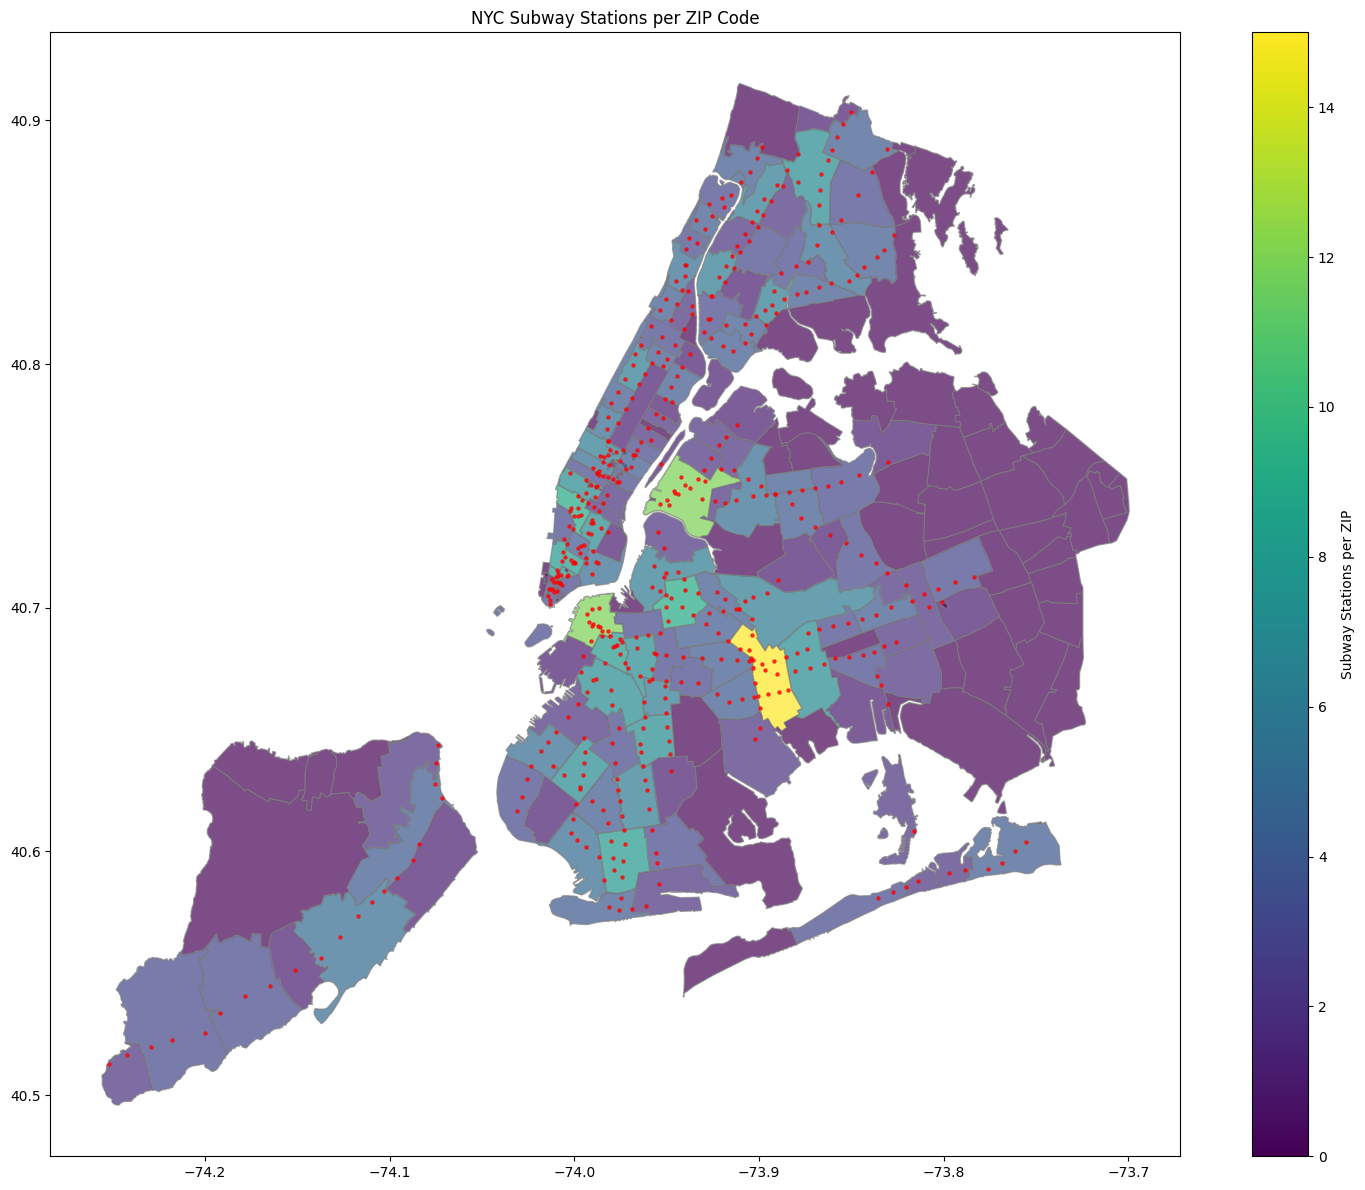

In [52]:
# Visualize the subway counts on a map
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
nyc_zip_with_counts.plot(
    column='subway_count',
    cmap='viridis',
    legend=True,
    ax=ax,
    edgecolor='gray',
    alpha=0.7,
    legend_kwds={'label': "Subway Stations per ZIP"}
)

# Add subway stations as points
subway_stations.plot(ax=ax, color='red', markersize=5, alpha=0.7)

plt.title('NYC Subway Stations per ZIP Code')
plt.tight_layout()
plt.savefig('output/nyc_subway_stations_by_zip.png', dpi=300)


In [53]:
# Prepare to add this data to your existing analysis dataset
subway_counts_df = pd.DataFrame(subway_counts)
subway_counts_df.rename(columns={'postalCode': 'zip_code'}, inplace=True)

# Save the subway counts for merging with your analysis dataframe
subway_counts_df.to_csv('clean_data/subway_stations_by_zip.csv', index=False)


In [54]:
# Merge subway data
merged_df = pd.merge(
    final_df, 
    subway_counts_df[['zip_code', 'subway_count']], 
    on='zip_code', 
    how='left'
)

In [55]:

# Fill missing values with 0
merged_df['subway_count'] = merged_df['subway_count'].fillna(0)
merged_df['bus_stop_count']=merged_df['bus_stop_count'].fillna(0)

In [56]:
merged_df.head()

,zip_code,total_population,male_population,female_population,age_under_18,age_18_to_44,age_45_plus,race_white,race_native_american,race_asian,...,shape_area,borough,PO_NAME,area_sqkm,area_sqmi,population_density,Education Index,Median_Household_Income,bus_stop_count,subway_count
0,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.830099e+07,Manhattan,Central Park,38.300990,14.788089,NaN,NaN,NaN,0.0,0.0
1,10001,29079.0,14069.0,15010.0,4010.6,15181.4,6331.0,15893.0,32.0,5228.0,...,1.779494e+07,Manhattan,New York,17.794941,6.870662,1634.116144,105.0,15097.0,63.0,7.0
2,10002,75517.0,38110.0,37407.0,10757.2,28954.8,18537.0,23597.0,262.0,27700.0,...,2.628013e+07,Manhattan,New York,26.280129,10.146810,2873.539973,69.8,35771.0,84.0,5.0
3,10003,53825.0,26407.0,27418.0,9148.8,27316.2,9077.0,36193.0,68.0,9639.0,...,1.553838e+07,Manhattan,New York,15.538376,5.999398,3464.004157,106.4,25080.0,57.0,7.0
4,10004,3875.0,2118.0,1757.0,793.8,2117.2,787.0,2460.0,0.0,923.0,...,1.355481e+07,Manhattan,New York,13.554813,5.233541,285.876307,124.6,1775.0,30.0,3.0


# Trader Joes

In [58]:
# Create a complete DataFrame for all NYC Trader Joe's locations
tj_df = pd.DataFrame({
    'name': [
        'Trader Joe\'s 72nd & Broadway',
        'Trader Joe\'s Chelsea',
        'Trader Joe\'s East Village',
        'Trader Joe\'s Essex Crossing',
        'Trader Joe\'s Harlem',
        'Trader Joe\'s Murray Hill',
        'Trader Joe\'s SoHo',
        'Trader Joe\'s Union Square',
        'Trader Joe\'s Upper East Side - Bridgemarket',
        'Trader Joe\'s Upper West Side',
        'Trader Joe\'s Brooklyn City Point',
        'Trader Joe\'s Williamsburg',
        'Trader Joe\'s Brooklyn (558)',
        'Trader Joe\'s Forest Hills',
        'Trader Joe\'s Long Island City',
        'Trader Joe\'s Rego Park',
        'Trader Joe\'s Staten Island',
        'Trader Joe\'s Staten Island (580)'
    ],
    'zip_code': [
        '10023',  # 72nd & Broadway
        '10010',  # Chelsea
        '10009',  # East Village
        '10002',  # Essex Crossing
        '10027',  # Harlem
        '10016',  # Murray Hill
        '10013',  # SoHo
        '10003',  # Union Square
        '10022',  # Upper East Side
        '10025',  # Upper West Side
        '11201',  # Brooklyn City Point
        '11249',  # Williamsburg
        '11201',  # Brooklyn (558)
        '11375',  # Forest Hills
        '11101',  # Long Island City 
        '11374',  # Rego Park
        '10314',  # Staten Island
        '10309'   # Staten Island (580) - not yet open
    ],
    'opening_order':[
        542,
        543,
        546,
        538,
        576,
        544,
        539,
        540,
        571,
        545,
        547,
        548,
        558,
        578,
        565,
        557,
        559,
        580  # Future store
    ],
    'lat': [
        40.7775,  # 72nd & Broadway
        40.7424,  # Chelsea
        40.7311,  # East Village
        40.7165,  # Essex Crossing
        40.8121,  # Harlem
        40.7446,  # Murray Hill
        40.7256,  # SoHo
        40.7335,  # Union Square
        40.7591,  # Upper East Side
        40.7866,  # Upper West Side
        40.6917,  # Brooklyn City Point (445 Gold St)
        40.7195,  # Williamsburg (200 Kent Ave)
        40.6887,  # Brooklyn (558) - Court St
        40.7210,  # Forest Hills (90-30 Metropolitan Ave)
        40.7477,  # Long Island City (22-43 Jackson Ave)
        40.7263,  # Rego Park (61-35 Junction Blvd)
        40.5837,  # Staten Island (2385 Richmond Ave)
        40.5258   # Staten Island (580) - Future location
    ],
    'lon': [
        -73.9821,  # 72nd & Broadway
        -73.9936,  # Chelsea
        -73.9808,  # East Village
        -73.9891,  # Essex Crossing
        -73.9448,  # Harlem
        -73.9784,  # Murray Hill
        -74.0042,  # SoHo
        -73.9874,  # Union Square
        -73.9637,  # Upper East Side
        -73.9683,  # Upper West Side
        -73.9810,  # Brooklyn City Point 
        -73.9645,  # Williamsburg
        -73.9927,  # Brooklyn (558) - Court St
        -73.8450,  # Forest Hills
        -73.9500,  # Long Island City
        -73.8616,  # Rego Park
        -74.1651,  # Staten Island
        -74.2178   # Staten Island (580) - Future location
    ],
    'status': [
        'Open',  # 72nd & Broadway
        'Open',  # Chelsea
        'Open',  # East Village
        'Open',  # Essex Crossing
        'Open',  # Harlem
        'Open',  # Murray Hill
        'Open',  # SoHo
        'Open',  # Union Square
        'Open',  # Upper East Side
        'Open',  # Upper West Side
        'Open',  # Brooklyn City Point
        'Open',  # Williamsburg
        'Open',  # Brooklyn (558)
        'Open',  # Forest Hills
        'Open',  # Long Island City
        'Open',  # Rego Park
        'Open',  # Staten Island
        'Coming Soon'  # Staten Island (580)
    ]
})

In [ ]:
tj_df['borough'] = [
    'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan',
    'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan',
    'Brooklyn', 'Brooklyn', 'Brooklyn',
    'Queens', 'Queens', 'Queens',
    'Staten Island', 'Staten Island'
]


In [ ]:
tj_df.to_csv('clean_data/trader_joes_locations.csv', index=False)

In [ ]:
tj_df.head()

,name,zip_code,opening_order,lat,lon,status,borough
0,Trader Joe's 72nd & Broadway,10023,542,40.7775,-73.9821,Open,Manhattan
1,Trader Joe's Chelsea,10010,543,40.7424,-73.9936,Open,Manhattan
2,Trader Joe's East Village,10009,546,40.7311,-73.9808,Open,Manhattan
3,Trader Joe's Essex Crossing,10002,538,40.7165,-73.9891,Open,Manhattan
4,Trader Joe's Harlem,10027,576,40.8121,-73.9448,Open,Manhattan


# Shop per zip-code

In [59]:
store_df=pd.read_csv("clean_data/nyc_stores.csv")

In [60]:
store_df.head()

,County,License Number,Operation Type,Establishment Type,Entity Name,DBA Name,Street Number,Street Name,Address Line 2,Address Line 3,City,State,Zip Code,Square Footage,Georeference,Zip_Code_Clean,Store_Category,Coordinates,is_specialty
0,KINGS,763133,Store,A,SKILLMART INC,SKILLMART,1010,BEDFORD AVE,NaN,NaN,BROOKLYN,NY,11205,NaN,POINT (-73.955486796 40.690346184),11205,A-Store,POINT (-73.955486796 40.690346184),False
1,BRONX,763132,Store,A,ARDENT PHARMACY INC,BENJAMINS PHARMACY & SURGICAL,987-989,ALLERTON AVE,NaN,NaN,BRONX,NY,10469,NaN,POINT (-73.858823252 40.865713996),10469,A-Store,POINT (-73.858823252 40.865713996),False
2,BRONX,763012,Store,A,BALDE FAMILY GENERAL MERCHANDISING LLC,BALDE FAMILY GENERAL MERCHANDISING,756,BURKE AVENUE,NaN,NaN,BRONX,NY,10467,NaN,POINT (-73.864832322 40.871259212),10467,A-Store,POINT (-73.864832322 40.871259212),False
3,BRONX,763011,Store,A,ESTRELLA MEATS FRUITS & GROCERY 2 CORP,ESTRELLA MEATS FRUITS & GROCERY 2,350,E GUN HILL RD,NaN,NaN,BRONX,NY,10467,NaN,POINT (-73.872836453 40.878631389),10467,A-Store,POINT (-73.872836453 40.878631389),False
4,QUEENS,762997,Store,A,HUA-TE NY INC,HUA-TE NY,42-14,MAIN ST,NaN,NaN,FLUSHING,NY,11355,NaN,POINT (-73.828313124 40.754958503),11355,A-Store,POINT (-73.828313124 40.754958503),False


In [62]:
# First, create count dataframes
store_count_by_zip = store_df['Zip_Code_Clean'].value_counts().reset_index()
store_count_by_zip.columns = ['zip_code', 'store_count']

tj_count_by_zip = tj_df['zip_code'].value_counts().reset_index()
tj_count_by_zip.columns = ['zip_code', 'tj_count']

# Convert both zip_code columns to the same data type (string is usually safer for zip codes)
store_count_by_zip['zip_code'] = store_count_by_zip['zip_code'].astype(str)
tj_count_by_zip['zip_code'] = tj_count_by_zip['zip_code'].astype(str)

# Now the merge should work
combined_counts = pd.merge(store_count_by_zip, tj_count_by_zip, on='zip_code', how='outer')

# Continue with the rest of your code as before
combined_counts = combined_counts.fillna(0)
combined_counts['store_count'] = combined_counts['store_count'].astype(int)
combined_counts['tj_count'] = combined_counts['tj_count'].astype(int)
combined_counts['total_stores'] = combined_counts['store_count'] + combined_counts['tj_count']
zip_store_count = combined_counts[['zip_code', 'total_stores']]

In [64]:
zip_store_count.head()

,zip_code,total_stores
0,10001,46
1,10002,129
2,10003,59
3,10004,5
4,10005,7


In [65]:
#merge to the final
final_df = pd.merge(
    merged_df, 
    zip_store_count, 
    on='zip_code', 
    how='left'
)
# Fill missing values with 0
final_df['total_stores'] = final_df['total_stores'].fillna(0)

In [66]:
final_df.head()

,zip_code,total_population,male_population,female_population,age_under_18,age_18_to_44,age_45_plus,race_white,race_native_american,race_asian,...,borough,PO_NAME,area_sqkm,area_sqmi,population_density,Education Index,Median_Household_Income,bus_stop_count,subway_count,total_stores
0,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Manhattan,Central Park,38.300990,14.788089,NaN,NaN,NaN,0.0,0.0,0.0
1,10001,29079.0,14069.0,15010.0,4010.6,15181.4,6331.0,15893.0,32.0,5228.0,...,Manhattan,New York,17.794941,6.870662,1634.116144,105.0,15097.0,63.0,7.0,46.0
2,10002,75517.0,38110.0,37407.0,10757.2,28954.8,18537.0,23597.0,262.0,27700.0,...,Manhattan,New York,26.280129,10.146810,2873.539973,69.8,35771.0,84.0,5.0,129.0
3,10003,53825.0,26407.0,27418.0,9148.8,27316.2,9077.0,36193.0,68.0,9639.0,...,Manhattan,New York,15.538376,5.999398,3464.004157,106.4,25080.0,57.0,7.0,59.0
4,10004,3875.0,2118.0,1757.0,793.8,2117.2,787.0,2460.0,0.0,923.0,...,Manhattan,New York,13.554813,5.233541,285.876307,124.6,1775.0,30.0,3.0,5.0


In [67]:
final_df.to_csv('clean_data/final.csv', index=False)